# Project: Wrangling and Analyze Data

## Table of Contents
<ol>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
  <ol>
    <a href="#archive">2.1 Assesing Enhanced Twitter Archive Data</a> <br>
    <a href="#pred">2.2 Assessing Image Predictions Data</a> <br>
    <a href="#api">2.3 Assessing Tweet Data from Twitter API</a> 
  </ol>
<li><a href="#quality">Quality Issues</a></li>
<li><a href="#tidy">Tidiness Issues</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#eda">Analyzing and Visualizing Data</a></li>
</ol>

In [1]:
# Import necessary libraries
import pandas as pd
import requests
import numpy as np
import json
import tweepy

<a id='gathering'></a>
## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
url = 'https://d17h27t6h515a5.cloutwitter_archive_cleanront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
images = requests.get(url)

In [ ]:
# Save HTML to file
with open("image-predictions.tsv", mode='wb')as file:
    file.write(images.content)

In [3]:
# Showing the data in the image predictions file
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [5]:
# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.errors.TweepyException as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
tweets = []
with open('tweet-json.txt') as file:
    for line in file:
        tweets.append(json.loads(line))
tweet_data = pd.DataFrame(tweets,columns = ['id','retweet_count', 'favorite_count'])

In [7]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
## Assessing Data

<a id='archive'></a>
### Assesing Enhanced Twitter Archive Data 
### Visual Assessment

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Programmatic Assesment

In [9]:
# Non-directed programmatic assessment
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1201,716447146686459905,NaN,NaN,2016-04-03 02:08:05 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ozzy. He's acrobatic af. Legendary pup...,NaN,NaN,NaN,https://vine.co/v/eMmXVPn5eQK,13,10,Ozzy,None,None,pupper,None
1782,677687604918272002,NaN,NaN,2015-12-18 03:11:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This was Cindy's face when she heard Susan for...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677687604...,11,10,None,None,None,None,None
311,835297930240217089,NaN,NaN,2017-02-25 01:18:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's a Benebop Cumberplop. Quite rar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835297930...,12,10,Ash,None,None,None,None
2150,669683899023405056,NaN,NaN,2015-11-26 01:07:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kloey. Her mother was a unicorn. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669683899...,10,10,Kloey,None,None,None,None
2135,670061506722140161,NaN,NaN,2015-11-27 02:08:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Liam. He has a particular set of skill...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670061506...,11,10,Liam,None,None,None,None


In [10]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

From the above, we can see that some denominators has zero ratings. Lets explore to see the IDs with this rating

In [14]:
#checking for the ids with zero denominator ratings
twitter_archive[twitter_archive.rating_denominator == 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

As we can see just one ID has zero as its denominator rating

In [15]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [16]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [17]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [18]:
twitter_archive.text[10]

'This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme'

In [19]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [20]:
# checking the dog stages
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

From this we can see that just 97 dogs have a doggo stage

In [21]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

From this we can see that just 257 dogs have a pupper stage

In [22]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

From this we can see that just 30 dogs have a puppo stage

In [23]:
twitter_archive.duplicated().sum()

0

<a id='pred'></a>
## Assessing the image predictions data
## Visual Assessment

In [24]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Programmatic Assesssment

In [25]:
# Non-directed programmatic assessment
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2042,885528943205470208,https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg,1,pug,0.369275,True,Labrador_retriever,0.265835,True,kuvasz,0.134697,True
1474,780459368902959104,https://pbs.twimg.com/media/CtS_p9kXEAE2nh8.jpg,1,Great_Dane,0.382491,True,German_shepherd,0.312026,True,bull_mastiff,0.033272,True
560,677716515794329600,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True
1252,747963614829678593,https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg,1,kelpie,0.307672,True,Irish_terrier,0.197486,True,dingo,0.105475,False
111,667902449697558528,https://pbs.twimg.com/media/CUTdvAJXIAAMS4q.jpg,1,Norwegian_elkhound,0.298881,True,malamute,0.279479,True,Eskimo_dog,0.198428,True


In [26]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [27]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
image_predictions.loc[1377]

tweet_id                                 763837565564780549
jpg_url     https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg
img_num                                                   1
p1                                                 malamute
p1_conf                                            0.375098
p1_dog                                                 True
p2                                                     jean
p2_conf                                            0.069362
p2_dog                                                False
p3                                                 keeshond
p3_conf                                            0.050528
p3_dog                                                 True
Name: 1377, dtype: object

In [29]:
# checking to see why the second prediction was a Jean
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg')

In [30]:
# checking value counts of each predictions(p1,p2,p3)
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [31]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [32]:
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [33]:
image_predictions.duplicated().sum()

0

<a id='api'></a>
## Assessing the Tweet Data from Twitter API
## Visual Assessment

In [34]:
tweet_data

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Programmatic Assessment

In [35]:
# Non-directed programmatic assessment
tweet_data.sample(10)

,id,retweet_count,favorite_count
1300,707610948723478529,7236,18557
409,823322678127919110,4637,17437
1420,698178924120031232,830,3084
1210,715342466308784130,768,3294
922,755206590534418437,6148,18212
2204,668631377374486528,349,763
294,837471256429613056,2631,13967
1270,709225125749587968,647,2615
70,878776093423087618,4319,19763
110,871032628920680449,3999,23255


In [36]:
tweet_data.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [37]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [38]:
tweet_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [39]:
tweet_data.duplicated().sum()

0

<a id='quality'></a>
### Quality issues
 #### Twitter Archive table
 
1. Erroneous datatypes(tweet_id, timestamp)

2. Some values in rating denominator column isn't "10"

3. Some values in rating numerator column less than "10"

4. 835246439529840640 tweet id has 0 as its rating denominator

5. The retweeted_status_id, retweeted_status_user_id and retweeted_timestamp columns should be removed because we are only interested in original ratings and drop both in_reply_to_status_id and in_reply_to_user_id columns which hold no volume of data.

6. Some names are wrong and nulls represented as (none) in name column 

#### Image Predictions table

7. Incorrect datatype for tweet_id
8. The names p columns have some upper letter and some lower letter
9. Multiple columns for a variable for dog prediction
10. Prediction columns (p1_conf,p2_conf_p3_conf) having 'conf' instead of 'confidence


#### Tweet Data table
11. Incorrect datatype for tweet_id
12. id column name should be "tweet_id" instead of "id"

<a id='tidy'></a>
### Tidiness issues
#### Twitter archive table
1. Dog stages doggo, floofer, pupper, and puppo should be in one column not 4 

- For the three datasets <br>
2. All tables are related so combine the 3 dataframes into 1 dataframe

<a id='clean'></a>
## Cleaning Data
In this section, clean **all** of the issues documented while assessing. 

In [40]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

### Issue #1: Quality
#### id column name should be "tweet_id" instead of "id"

#### Define
Rename the 'id' column to 'tweet_id'

#### Code

In [41]:
tweet_data_clean = tweet_data.rename(columns = {'id':'tweet_id'})

#### Test

In [42]:
tweet_data_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue #2: Tidiness
All tables are related so combine the 3 dataframes into 1 dataframe

#### Define
Merge the tables with the merge method

#### Code

In [43]:
twitter_archive_clean = pd.merge(twitter_archive_clean , image_predictions_clean , on= "tweet_id" , how="left") 
twitter_archive_clean = pd.merge(twitter_archive_clean , tweet_data_clean , on= "tweet_id" , how="left")

#### Test

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #3: Quality
The retweeted_status_id, retweeted_status_user_id and retweeted_timestamp columns should be removed because we are only interested in original ratings and drop both in_reply_to_status_id and in_reply_to_user_id columns which hold no volume of data.

#### Define
Remove all rows that have values (not blank or non-null) in the retweet-related columns then drop columns

#### Code

In [46]:
# filtering retweets columns
drop_retweet = twitter_archive_clean[pd.notnull(twitter_archive_clean['retweeted_status_id'])].index
drop_reply = twitter_archive_clean[pd.notnull(twitter_archive_clean['in_reply_to_status_id'])].index

In [47]:
twitter_archive_clean.drop(index=drop_retweet, inplace=True)
twitter_archive_clean.drop(index=drop_reply, inplace=True)

In [48]:
# Test that retweets are no longer present
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [49]:
# Drop retweet related columns
twitter_archive_clean.drop(columns=['retweeted_status_id' , 'retweeted_status_user_id' 
                                                            , 'retweeted_status_timestamp','in_reply_to_status_id',
                                                           'in_reply_to_user_id'],axis=1, inplace=True)

#### Test

In [50]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count'],
      dtype='object')

### Issue #4: Quality
Incorrect datatype for tweet_id

#### Define:
Convert tweet_id from int to str using astype method

#### Code

In [51]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

#### Test

In [52]:
type(twitter_archive_clean.tweet_id[0])

str

### Issue #5: Tidiness
Dog stages doggo, floofer, pupper, and puppo should be in one column not 4

#### Define
Extract the dog stage from text using str.extract method and put it in new column 'dog stage' then drop the real columns

#### Code

In [53]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter_archive_clean = twitter_archive_clean.drop(columns = ['doggo','floofer','pupper','puppo'])

#### Test

In [54]:
twitter_archive_clean.dog_stage.value_counts()

pupper     240
doggo       80
puppo       29
floofer      4
Name: dog_stage, dtype: int64

### Issue #6: Quality
Incorrect datatype for timestamp

#### Define
Convert the datatype from object to datetime using to_datetime method

#### Code

In [55]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'],format = "%Y-%m-%d %H:%M:%S")

#### Test

In [56]:
type(twitter_archive_clean.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

### Issue #7: Quality
The name p columns have some upper letter and some lower letter

#### Define
Convert to capital using str.title method

#### Code

In [58]:
twitter_archive_clean['p1'] = twitter_archive_clean['p1'].str.title()
twitter_archive_clean['p2'] = twitter_archive_clean['p2'].str.title()
twitter_archive_clean['p3'] = twitter_archive_clean['p3'].str.title()

#### Test

In [59]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,Bagel,0.085851,False,Banana,0.076110,False,8853.0,39467.0,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774.0,41048.0,NaN


### Issue #8: Quality
Prediction columns (p1_conf,p2_conf_p3_conf) having 'conf' instead of 'confidence

#### Define
Rename the columns using .rename method

#### Code

In [61]:
twitter_archive_clean.rename(columns = {'p1_conf':'first_breed_confidence',
                                                               'p2_conf':'second_breed_confidence',
                                                               'p3_conf':'third_breed_confidence'},inplace=True)

#### Test

In [62]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,second_breed_confidence,p2_dog,p3,third_breed_confidence,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,Bagel,0.085851,False,Banana,0.07611,False,8853.0,39467.0,NaN


### Issue #9 & #10: Quality
835246439529840640 tweet id has 0 as its rating denominator
Some values in rating numerator column less than "10"

#### Define
Add 10 to correct these values to handle both issues

#### Code

In [63]:
twitter_archive_clean.rating_numerator[twitter_archive_clean['rating_numerator'] <= 10 ] = twitter_archive_clean.rating_numerator[twitter_archive_clean['rating_numerator'] <= 10 ].add(10)

/var/folders/h2/cbps_lcn21j_11ch2d9lq3z00000gn/T/ipykernel_62474/3417593879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean.rating_numerator[twitter_archive_clean['rating_numerator'] <= 10 ] = twitter_archive_clean.rating_numerator[twitter_archive_clean['rating_numerator'] <= 10 ].add(10)


#### Test

In [64]:
twitter_archive_clean['rating_numerator'].value_counts()

12      495
20      436
11      418
13      306
19      153
18       98
14       54
17       52
15       34
16       32
99        1
88        1
144       1
26        1
121       1
44        1
60        1
45        1
80        1
204       1
50        1
1776      1
165       1
27        1
75        1
24        1
84        1
10        1
420       1
Name: rating_numerator, dtype: int64

### Issue #11: Quality
Some values in rating denominator column isn't "10"<br>

#### Define
Replace any values less than 10 to 10 using .replace method

#### Code

In [65]:
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.replace(range(0,1000),10)

#### Test

In [66]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2097
Name: rating_denominator, dtype: int64

### Issue #12: Quality
Some names are wrong and nulls represented as (none) in name column

#### Define
Convert wrong names to nans and replace none names with nulls using .replace method and numpy nan method

#### Code

In [67]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

In [68]:
twitter_archive_clean.name = twitter_archive_clean.name.replace('None', np.nan)

#### Test

In [69]:
twitter_archive_clean.name.isnull().sum()

707

In [70]:
twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


### Issue13: Quality
Multiple columns for a variable for dog prediction <br>
Extract dog breed from prediction data

#### Define
Create a new column dog_breed from prediction columns. Then rename the p1_dog, p2_dog and p3_dog columns. Drop the p1, p2 and p3 prediction columns. 

#### Code

In [71]:
twitter_archive_clean['dog_breed'] = 'None'

for i, row in twitter_archive_clean.iterrows():

    if row.p1_dog:
        twitter_archive_clean.at[i, 'dog_breed'] = row.p1
    elif row.p2_dog and row.rating_numerator >= 10:
        twitter_archive_clean.at[i, 'dog_breed']= row.p2
    elif row.p3_dog and row.rating_numerator >= 10:
        twitter_archive_clean.at[i, 'dog_breed'] = row.p3
    else:
        twitter_archive_clean.at[i, 'dog_breed'] = 'None'

In [72]:
twitter_archive_clean.rename(columns={'p1_dog':'first_dog_prediction',
                                     'p2_dog':'second_dog_prediction',
                                     'p3_dog':'third_dog_prediction'},inplace=True)

In [73]:
twitter_archive_clean = twitter_archive_clean.drop(columns=['p1','p2','p3'])

#### Test

In [74]:
twitter_archive_clean['dog_breed'].value_counts()

None                  305
Golden_Retriever      156
Labrador_Retriever    106
Pembroke               94
Chihuahua              90
                     ... 
Entlebucher             1
Japanese_Spaniel        1
Standard_Schnauzer      1
Silky_Terrier           1
Irish_Wolfhound         1
Name: dog_breed, Length: 114, dtype: int64

In [75]:
# Replace none values with nulls
twitter_archive_clean.dog_breed = twitter_archive_clean.dog_breed.replace('None', np.nan)

In [76]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,first_breed_confidence,first_dog_prediction,second_breed_confidence,second_dog_prediction,third_breed_confidence,third_dog_prediction,retweet_count,favorite_count,dog_stage,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,0.097049,False,0.085851,False,0.076110,False,8853.0,39467.0,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,0.323581,True,0.090647,True,0.068957,True,6514.0,33819.0,NaN,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,0.716012,True,0.078253,True,0.031379,True,4328.0,25461.0,NaN,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,0.170278,False,0.168086,True,0.040836,False,8964.0,42908.0,NaN,Labrador_Retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,0.555712,True,0.225770,True,0.175219,True,9774.0,41048.0,NaN,Basset


<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [77]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='eda'></a>
## Analyzing and Visualizing Data

In [ ]:
twitter_archive_clean

### Insights and  Visualization

1. Popular Dog Stage by percentage 

2. Most popular Dog breeds

3. Most dog tweet favorited and retweeted
4. Relationship between favorite count and retweet count


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dog Stage Percentage

Text(0.5, 1.0, 'Percentage of different Dog Stages')

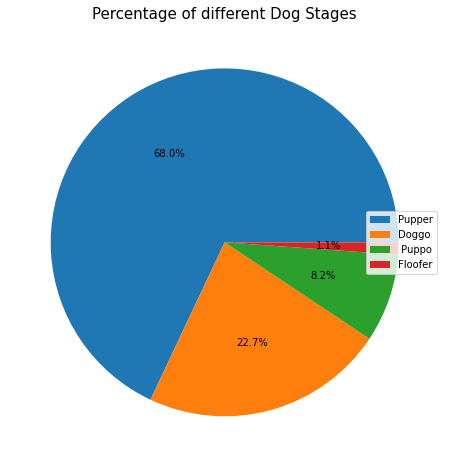

In [79]:
def autopct(pct):
    return ('%.2f' % pct)

labels = ('Pupper', 'Doggo', ' Puppo', 'Floofer')
ax = twitter_archive_clean['dog_stage'].value_counts().plot(kind='pie', figsize=(18,8), autopct="%1.1f%%", labels=None)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=5, labels=labels)
plt.title('Percentage of different Dog Stages',fontsize=15)

We can infer from this that Pupper is the Most Popular dog stage with 68% while Floofer is the least popular stage with 1.1% 


### Most popular Dog Breeds

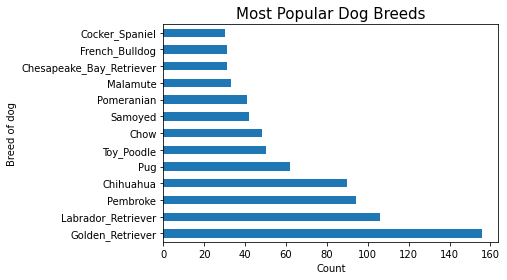

In [80]:
dog_breed = twitter_archive_clean.groupby('dog_breed').filter(lambda x: len(x) >= 25)

dog_breed['dog_breed'].value_counts().plot(kind ='barh')
plt.title('Most Popular Dog Breeds', fontsize=15)
plt.xlabel('Count')
plt.ylabel('Breed of dog');

We can infer from this that Golden Retriever is the most popular dog breed while Cocker Spaniel is the least popular dog breed.

### Most Dog tweet favorited and retweeted

In [81]:
# max of favourite count
twitter_archive_clean[twitter_archive_clean['favorite_count'] == twitter_archive_clean['favorite_count'].max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,first_breed_confidence,first_dog_prediction,second_breed_confidence,second_dog_prediction,third_breed_confidence,third_dog_prediction,retweet_count,favorite_count,dog_stage,dog_breed
413,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,NaN,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,0.196015,True,0.160329,True,0.069126,True,48265.0,132810.0,puppo,Lakeland_Terrier


In [82]:
# max of retweet count
twitter_archive_clean[twitter_archive_clean['retweet_count'] == twitter_archive_clean['retweet_count'].max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,first_breed_confidence,first_dog_prediction,second_breed_confidence,second_dog_prediction,third_breed_confidence,third_dog_prediction,retweet_count,favorite_count,dog_stage,dog_breed
1039,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,0.825333,True,0.044681,False,0.018442,True,79515.0,131075.0,doggo,Labrador_Retriever


In [83]:
# viewing the most retweet tweet
twitter_archive_clean.query('tweet_id == "744234799360020481"').text.tolist()

["Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"]

In [84]:
# viewing the dog breed with the most favorited tweet 
Image(url = 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg',)

The most favorited dog tweet was from Lakeland Terrier breed, it was favorited by 132810 users while the most retweeted dog tweet was from Labrador Retriever breed it was retweeted 79515 times.

### Relationship between Favorite Count and Retweet Count

In [85]:
# Correlation
twitter_archive_clean.corr()

,rating_numerator,rating_denominator,img_num,first_breed_confidence,second_breed_confidence,third_breed_confidence,retweet_count,favorite_count
rating_numerator,1.000000,NaN,-0.022674,-0.019713,-0.019263,-0.000793,-0.018737,-0.034047
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img_num,-0.022674,NaN,1.000000,0.202765,-0.156895,-0.137720,0.108322,0.138330
first_breed_confidence,-0.019713,NaN,0.202765,1.000000,-0.510649,-0.707916,0.053674,0.078291
second_breed_confidence,-0.019263,NaN,-0.156895,-0.510649,1.000000,0.480698,-0.018573,-0.021465
third_breed_confidence,-0.000793,NaN,-0.137720,-0.707916,0.480698,1.000000,-0.043431,-0.052545
retweet_count,-0.018737,NaN,0.108322,0.053674,-0.018573,-0.043431,1.000000,0.911201
favorite_count,-0.034047,NaN,0.138330,0.078291,-0.021465,-0.052545,0.911201,1.000000


Text(0.5, 1.0, 'Relationship between Favorite Count and Retweet Count')

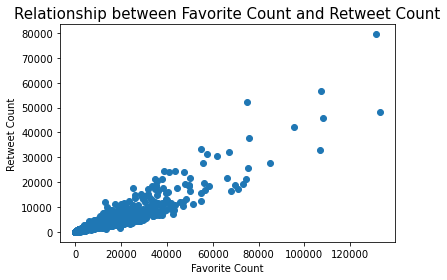

In [86]:
plt.scatter(twitter_archive_clean['favorite_count'],twitter_archive_clean['retweet_count'])
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Relationship between Favorite Count and Retweet Count',fontsize=15)

Based on these, the correlation coefficient beteen retweet count and favorite count is 0.911201, which is close to 1 and positive demonstrating a strong positive correlation bewteen those two metrics. 